# IVSA analysis of cohort01 (PM-ICSS group)

**Note:**
Edits made to IVSA original file !2019-04-05 to remove data of Cohort02

**METADATA:**

|Sex    | ICSS+ShA | ICSS+LgA   | NO-ICSS+ShA | NO-ICSS+LgA |
|:-----:|:--------:|:----------:|:-----------:|:-----------:|
|Males  | SG17     | SG15       | SG11        | SG23        |
|-------|----------|------------|-------------|-------------|
|Females| SG14     | SG24, SG20 | SG16        | SG26        |
|-------|----------|------------|-------------|-------------|

**OUTLINE:**

---

In [6]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
%%R
library(tidyverse)
library(lubridate)

---
## 1. Load data

In [34]:
%%capture
%%R
IVSA_dataDir <- "~/Dropbox (Partners HealthCare)/Projects/R01_2017_OxycSA-NASh-Glutamate/_data_R01_2017/_data_R01_2017_IVSA/Male-Female/ShA+LgA/PM_ICSS/Cohort01/_csvFiles"
IVSA_data <- read_csv(file.path(IVSA_dataDir,"_ivsaData_pm_cohort01.csv"))

In [35]:
%%R
IVSA_data %>% print

# A tibble: 25,190 x 7
   date       cohort    regimen group   subjectID eventType eventTime
   <date>     <chr>     <chr>   <chr>   <chr>     <chr>         <dbl>
 1 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards          49
 2 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards         323
 3 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards         853
 4 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards        2600
 5 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards        2616
 6 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards        2697
 7 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      corrLever        49
 8 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      corrLever        49
 9 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      corrLever       323
10 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      corrLever       324
# ... with 25,180 more rows


In [36]:
%%R
# This needs to be defined after loading the dataset
# Ideal data types
# date   |  cohort  | regimen  |   group  |  subjectID   |  eventType  | eventTime
# <date> | <factor> | <factor> | <factor> |   <factor>   |   <factor>  |  <num>
IVSA_data$cohort <- IVSA_data$cohort %>% as.factor
IVSA_data$regimen <- IVSA_data$regimen %>% as.factor
IVSA_data$group <- IVSA_data$group %>% as.factor
IVSA_data$subjectID <- IVSA_data$subjectID %>% as.factor
IVSA_data$eventType <- IVSA_data$eventType %>% as.factor
IVSA_data %>% print

# A tibble: 25,190 x 7
   date       cohort    regimen group   subjectID eventType eventTime
   <date>     <fct>     <fct>   <fct>   <fct>     <fct>         <dbl>
 1 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards          49
 2 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards         323
 3 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards         853
 4 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards        2600
 5 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards        2616
 6 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      rewards        2697
 7 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      corrLever        49
 8 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      corrLever        49
 9 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      corrLever       323
10 2019-02-20 ICSS+IVSA 1H      FEMALES SG14      corrLever       324
# ... with 25,180 more rows


---
## 2. Annotate data

---
## 2. Overview and data integrity check

In [29]:
%%R
IVSA_data$cohort %>% unique

[1] ICSS+IVSA    NO-ICSS+IVSA
Levels: ICSS+IVSA NO-ICSS+IVSA


In [30]:
%%R
IVSA_data$regimen %>% unique

[1] 1H 6H 2H
Levels: 1H 2H 6H


In [31]:
%%R
IVSA_data$group %>% unique

[1] FEMALES MALES  
Levels: FEMALES MALES


In [32]:
%%R
IVSA_data$subjectID %>% unique

[1] SG14 SG20 SG24 SG15 SG17 SG16 SG26 SG11 SG23
Levels: SG11 SG14 SG15 SG16 SG17 SG20 SG23 SG24 SG26


In [33]:
%%R
IVSA_data$eventType %>% unique

[1] rewards     corrLever   incorrLever
Levels: corrLever incorrLever rewards


---
## 3. Plot individual animals

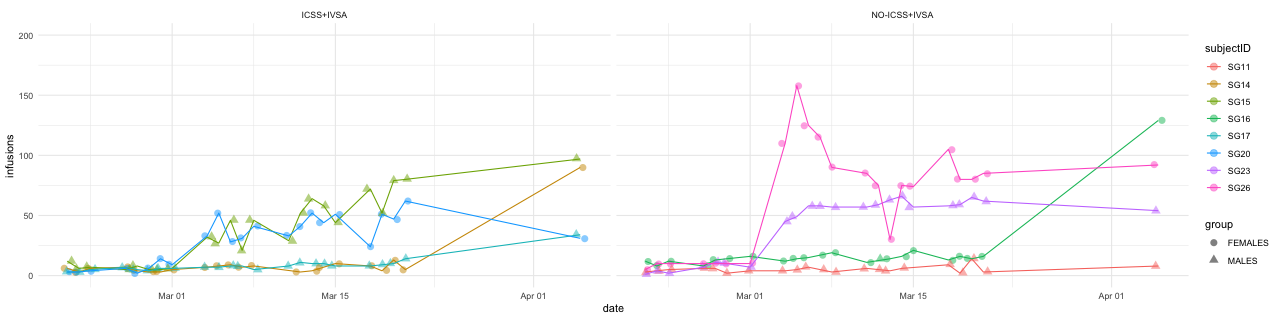

In [138]:
%%R -w 1280 -h 320
IVSA_data %>% 
filter(eventType == "rewards" & subjectID != "SG24") %>% select(date, cohort, group, subjectID, eventTime) %>%
group_by(date, cohort, group, subjectID) %>% 
summarise(infusions = n()) %>% ungroup %>% 
ggplot(aes(x = date, y = infusions, color = subjectID, fill = subjectID, shape = group)) +
geom_jitter(alpha = 0.5, size = 3) + geom_line() +
ylim(0, 200) +
facet_wrap(vars(cohort)) +
theme_minimal()

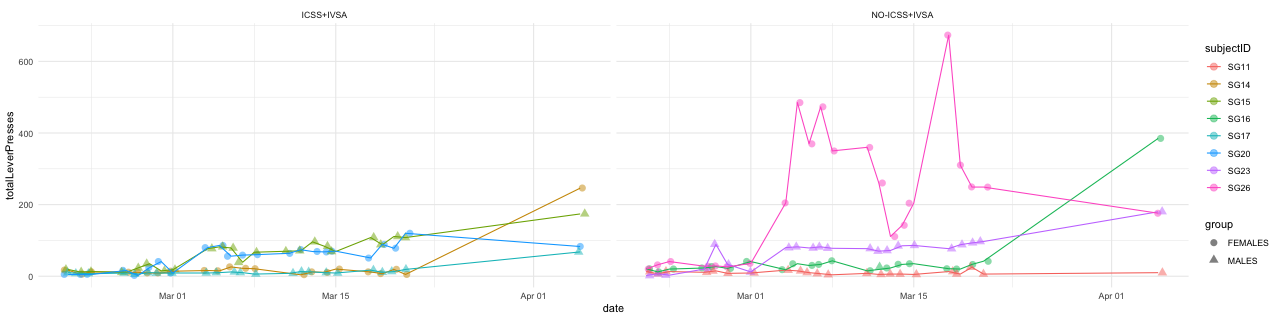

In [134]:
%%R -w 1280 -h 320
IVSA_data %>% 
filter(eventType == "corrLever" | eventType == "incorrLever") %>% filter(subjectID != "SG24") %>% select(date, cohort, group, subjectID, eventTime) %>%
group_by(date, cohort, group, subjectID) %>% 
summarise(totalLeverPresses = n()) %>% ungroup %>% 
ggplot(aes(x = date, y = totalLeverPresses, color = subjectID, fill = subjectID, shape = group)) +
geom_jitter(alpha = 0.5, size = 3) + geom_line() +
facet_wrap(vars(cohort)) +
theme_minimal()

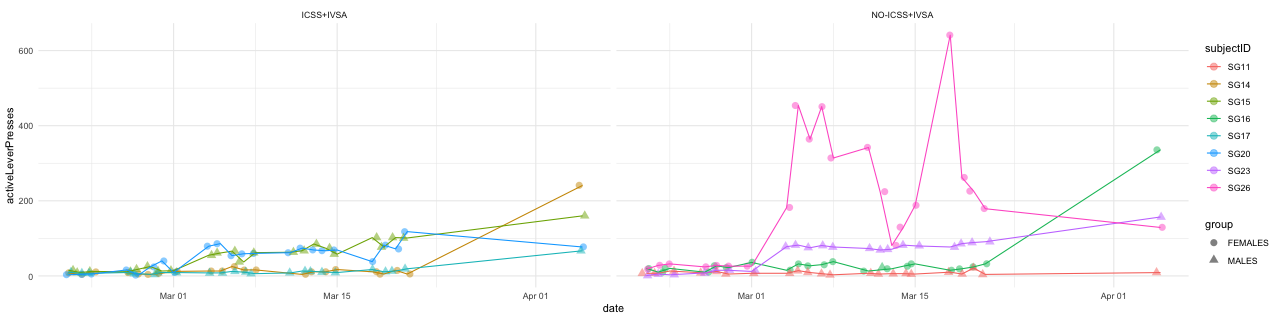

In [142]:
%%R -w 1280 -h 320
IVSA_data %>% 
filter(eventType == "corrLever" & subjectID != "SG24") %>% select(date, cohort, group, subjectID, eventTime) %>%
group_by(date, cohort, group, subjectID) %>% 
summarise(activeLeverPresses = n()) %>% ungroup %>% 
ggplot(aes(x = date, y = activeLeverPresses, color = subjectID, fill = subjectID, shape = group)) +
geom_jitter(alpha = 0.5, size = 3) + geom_line() +
facet_wrap(vars(cohort)) +
theme_minimal()

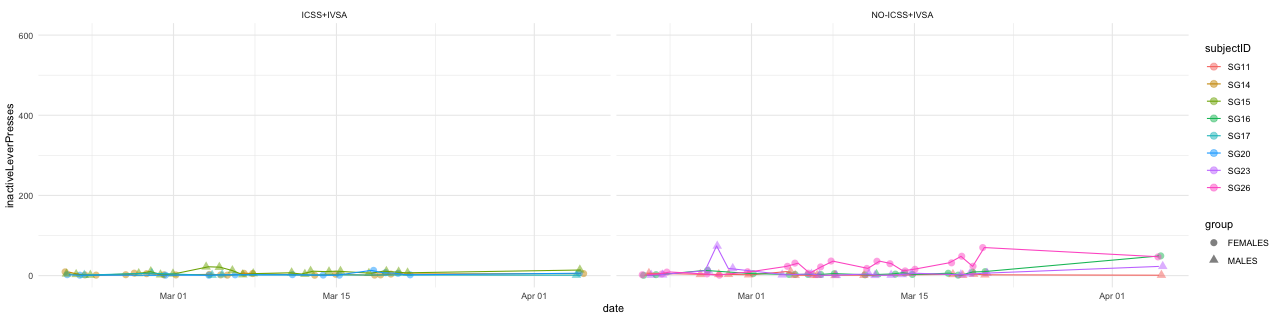

In [135]:
%%R -w 1280 -h 320
IVSA_data %>% 
filter(eventType == "incorrLever" & subjectID != "SG24") %>% select(date, cohort, group, subjectID, eventTime) %>%
group_by(date, cohort, group, subjectID) %>%
summarise(inactiveLeverPresses = n()) %>% ungroup %>% 
ggplot(aes(x = date, y = inactiveLeverPresses, color = subjectID, fill = subjectID, shape = group)) +
geom_jitter(alpha = 0.5, size = 3) + geom_line() +
ylim(0, 600) +
facet_wrap(vars(cohort)) +
theme_minimal()

---
## 4. Plot group-wise data
### 4.1. Scatter and line plots

### 4.2. Mean +/- SEM plots